<a href="https://colab.research.google.com/github/simranbains9810/mark_carney_speech_analysis/blob/main/speech_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Key risk identification from Mark Carney speeches**

*By Simran Bains*

---



Installing and updating the text mining library pdfplumber into the local Colab environment

In [1]:
!pip install --upgrade pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.1 MB/s eta 0:00:00


# **Web scraping**

---



This section outlies the comprehensive text mining operations executed to analyse Mark Carney's speeches. These operations encompass several stages, including scripts for web scraping to gather speeches from the Bank of England's website, text extraction, and conversion to plain text format. Further preprocessing steps involve word tokenization and the removal of stop words to prepare the data for analysis. The speeches were specifically sourced from the Bank of England's website by applying filters to isolate those given by Mark Carney.

In [2]:
# Define the directory path
import os
directory_path = "/content/speeches"
os.mkdir(directory_path)

In [3]:
%cd speeches

/content/speeches


In [4]:
import requests
urls = ["https://www.bankofengland.co.uk/-/media/boe/files/speech/2020/the-grand-unifying-theory-and-practice-of-macroprudential-policy-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2020/the-road-to-glasgow-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2020/a-framework-for-all-seasons-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2019/remarks-by-mark-carney-at-the-ecb-farewell-board-dinner-for-benoit-coeure.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2019/remarks-by-mark-carney-at-the-us-climate-action-centre-madrid.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2019/addressing-the-growing-challenges-in-the-international-monetary-and-financial-system-slides.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2019/light-is-therefore-colour-governor-remarks-at-the-new-20-launch.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2019/tcfd-strengthening-the-foundations-of-sustainable-finance-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2019/remarks-given-during-the-un-secretary-generals-climate-actions-summit-2019-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2019/the-growing-challenges-for-monetary-policy-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2019/50-note-character-selection-announcement-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2019/sea-change-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2019/enable-empower-ensure-a-new-finance-for-the-new-economy-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2019/remarks-to-open-policy-panel-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2019/finance-by-all-for-all-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2019/pull-push-pipes-sustainable-capital-flows-for-a-new-world-order-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2019/a-platform-for-innovation-remarks-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2019/investing-in-ethnicity-and-race-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2019/a-new-horizon-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2019/the-global-outlook-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2018/remarks-at-the-accounting-for-sustainability-summit-2018.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2018/50-character-selection-and-future-forum-launch.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2018/ai-and-the-global-economy-mark-carney-slides.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2018/true-finance-ten-years-after-the-financial-crisis-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2018/the-future-of-work-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2018/from-protectionism-to-prosperity-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2018/new-economy-new-finance-new-bank-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2018/guidance-contingencies-and-brexit-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2018/staying-connected-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2018/opening-remarks-by-mark-carney-at-the-econome-launch-event.pdf",
        #"https://www.bankofengland.co.uk/speech/2018/mark-carney-speech-at-the-public-policy-forum-toronto",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2018/a-transition-in-thinking-and-action-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2018/the-future-of-money-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2018/reflections-on-leadership-in-a-disruptive-age-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2017/turning-back-the-tide-speech-by-mark-carney.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2017/opening-remarks-at-future-forum-2017.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2017/opening-remarks-at-the-boe-independence-20-years-on-conference.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2017/de-globalisation-and-inflation.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2017/policy-panel-investment-and-growth-in-advanced-economies.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2017/a-fine-balance.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2017/what-a-difference-a-decade-makes.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2017/building-the-infrastructure-to-realise-fintechs-promise.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2017/the-high-road-to-a-responsible-open-financial-system.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2017/banking-standards-board-worthy-of-trust-law-ethics-and-culture-in-banking.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2017/reflecting-diversity-choosing-the-inclusion.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2017/the-promise-of-fintech-something-new-under-the-sun.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2017/lambda.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2016/remarks-on-the-launch-of-the-recommendations-of-the-task-force-on-climate-related.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2016/the-spectre-of-monetarism.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2016/resolving-the-climate-paradox.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2016/uncertainty-the-economy-and-policy.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2016/enabling-the-fintech-transformation-revolution-restoration-or-reformation.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2016/the-sustainable-development-goal-imperative.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2016/opening-remarks-by-mark-carney-to-the-empowering-productivity-harnessing-the-talents.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2016/redeeming-an-unforgiving-world.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2016/the-turn-of-the-year.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2015/opening-statement-at-the-european-parliaments-econ-committee.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2015/closing-remarks-to-the-boe-open-forum.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2015/introduction-to-the-open-forum.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2015/the-european-union-monetary-and-financial-stability-and-the-boe.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2015/breaking-the-tragedy-of-the-horizon-climate-change-and-financial-stability.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2015/three-truths-for-finance.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2015/inflation-in-a-globalised-world.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2015/from-lincoln-to-lothbury-magna-carta-and-the-boe.pdf",
        #"https://www.bankofengland.co.uk/speech/2015/inclusive-capitalism-conference-in-conversation-with-governor-mark-carney",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2015/building-real-markets-for-the-good-of-the-people.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2015/writing-the-path-back-to-target.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2015/one-bank-research-agenda-launch-conference.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2015/fortune-favours-the-bold.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2014/the-future-of-financial-reform.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2014/regulatory-work-underway-and-lessons-learned.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2014/putting-the-right-ideas-into-practice.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2014/mark-carney-speech-at-the-trades-union-congress.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2014/winning-the-economic-marathon.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2014/mark-carney-speech-at-the-lord-mayors-banquet-for-bankers-and-merchants-of-the-city-of-london.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2014/inclusive-capitalism-creating-a-sense-of-the-systemic.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2014/one-mission-one-bank-promoting-the-good-of-the-people-of-the-uk.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2014/the-economics-of-currency-unions.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2014/remarks-given-by-mark-carney-at-davos-cbi-british-business-leaders-lunch.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2013/remarks-given-by-mark-carney-governor-regarding-polymer-notes-and-the-review-of-the-banknote-charact.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2013/the-spirit-of-the-season.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2013/the-uk-at-the-heart-of-a-renewed-globalisation.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2013/crossing-the-threshold-to-recovery.pdf",
        "https://www.bankofengland.co.uk/-/media/boe/files/speech/2013/jane-austens-house-museum-remarks-by-mark-carney.pdf"
]

In [5]:
# Scraping PDFs from URLs
for url in urls:
    response = requests.get(url)
    if response.status_code == 200:
        file_path = os.path.join(directory_path, os.path.basename(url))
        with open(file_path, "wb") as f:
            f.write(response.content)

In [6]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

for url in urls:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        file_path = os.path.join(directory_path, os.path.basename(url))
        with open(file_path, "wb") as f:
            f.write(response.content)
        print(f"Successfully downloaded: {url}")
    else:
        print(f"Failed to download: {url} - Status code: {response.status_code}")

Successfully downloaded: https://www.bankofengland.co.uk/-/media/boe/files/speech/2020/the-grand-unifying-theory-and-practice-of-macroprudential-policy-speech-by-mark-carney.pdf
Successfully downloaded: https://www.bankofengland.co.uk/-/media/boe/files/speech/2020/the-road-to-glasgow-speech-by-mark-carney.pdf
Successfully downloaded: https://www.bankofengland.co.uk/-/media/boe/files/speech/2020/a-framework-for-all-seasons-speech-by-mark-carney.pdf
Successfully downloaded: https://www.bankofengland.co.uk/-/media/boe/files/speech/2019/remarks-by-mark-carney-at-the-ecb-farewell-board-dinner-for-benoit-coeure.pdf
Successfully downloaded: https://www.bankofengland.co.uk/-/media/boe/files/speech/2019/remarks-by-mark-carney-at-the-us-climate-action-centre-madrid.pdf
Successfully downloaded: https://www.bankofengland.co.uk/-/media/boe/files/speech/2019/addressing-the-growing-challenges-in-the-international-monetary-and-financial-system-slides.pdf
Successfully downloaded: https://www.bankofengl

# **Text Extraction**

---



In [7]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.9 MB/s eta 0:00:00


In [8]:
from PyPDF2 import PdfReader
print("PyPDF2 successfully imported!")

PyPDF2 successfully imported!


In [9]:
import pdfplumber
import os
pdf_list = os.listdir(directory_path)

# Ensure valid_pdfs list is used
txt_list = [pdf[:-4] + ".txt" for pdf in pdf_list]

# Extracting text from valid PDFs
for i in range(len(pdf_list)):
    file_path = os.path.join(directory_path, pdf_list[i])
    output_path = os.path.join(directory_path, txt_list[i])
    with open(output_path, "wt") as out:  # open text output
        try:
            with pdfplumber.open(file_path) as pdf:
                for pdf_page in pdf.pages:
                    page_text = pdf_page.extract_text()
                    if page_text:  # Check if text is extracted
                        out.write(page_text)
            print(f"Extracted text from: {pdf_list[i]}")
        except Exception as e:
            print(f"Error extracting text from {pdf_list[i]}: {e}")

Extracted text from: jane-austens-house-museum-remarks-by-mark-carney.pdf
Extracted text from: one-bank-research-agenda-launch-conference.pdf
Extracted text from: remarks-by-mark-carney-at-the-ecb-farewell-board-dinner-for-benoit-coeure.pdf
Extracted text from: true-finance-ten-years-after-the-financial-crisis-speech-by-mark-carney.pdf
Extracted text from: the-road-to-glasgow-speech-by-mark-carney.pdf
Extracted text from: remarks-by-mark-carney-at-the-us-climate-action-centre-madrid.pdf
Extracted text from: the-future-of-financial-reform.pdf
Extracted text from: crossing-the-threshold-to-recovery.pdf
Extracted text from: the-global-outlook-speech-by-mark-carney.pdf
Extracted text from: remarks-given-by-mark-carney-at-davos-cbi-british-business-leaders-lunch.pdf
Extracted text from: building-the-infrastructure-to-realise-fintechs-promise.pdf
Extracted text from: guidance-contingencies-and-brexit-speech-by-mark-carney.pdf
Extracted text from: new-economy-new-finance-new-bank-speech-by-ma

# **Text pre-processing**

---



In [10]:
import re
import unicodedata
import pandas as pd
import requests
import spacy
from bs4 import BeautifulSoup

We will explore spaCy for advanced NLP which is a library containing statistical models capable of parsing texts, identifying parts-of-speech and extracting entities.

In [11]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

In [12]:
d1, d2 = {}, {}

for i in range(len(txt_list)):
    with open(os.path.join(directory_path, txt_list[i]), "rt") as file:
        text = file.read()
        d1[pdf_list[i][:-4]] = text

In [13]:
# Remove repeating strings
del_strings = [
    "all speeches are available online at",
    "all speeches are available online",
    "all speeches available online",
    "speeches are available online at",
    "speeches available online at",
    "speeches available online",
    "wwwbankofenglandcoukpublicationspagesspeechesdefaultaspx",
    "wwwbankofenglandcoukpublicationsspeeches",
    "wwwbankofenglandcouknewsspeeches",
    "wwwbankofenglandcoukspeeches",
    "boepressoffice",
    "remarks by",
    "speech given by",
    "mark carney",
    "the views are not necessarily those of the bank of england or the monetary policy committee",
    "the views are not necessarily those of the bank of england or the financial policy committee",
    "the views expressed within are not necessarily those of the bank of england or the monetary policy committee",
    "the views expressed within are not necessarily those of the bank of england or the financial policy committee",
    "i would like to thank",
    "and the staff of the bank’s archives",
    "for comments and contributions",
    "for their comments and contributions",
    "et al",
]

In [14]:
for key in d1.keys():
    cleaned_text = d1[key].lower()
    for pattern in del_strings:
        cleaned_text = re.sub(pattern, " ", cleaned_text)
    cleaned_text = re.sub(r"\s+", " ", cleaned_text).strip()  # Normalize spaces
    d1[key] = cleaned_text

# Tokenize and remove stop words using spaCy
for key, text in d1.items():
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    d2[key] = " ".join(tokens)

# Step 3: Extract additional text from HTML (if provided)
url_html = [
    "https://www.bankofengland.co.uk/speech/2015/inclusive-capitalism-conference-in-conversation-with-governor-mark-carney"
]
speech_html, d3, d4 = [], {}, {}

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0 Safari/537.36"
}
for url in url_html:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        raw_text = soup.get_text(separator="\n")
        cleaned_text = re.sub(r"[^\w\s]", "", raw_text.lower())
        cleaned_text = unicodedata.normalize("NFKD", cleaned_text)
        cleaned_text = re.sub(r"\s+", " ", cleaned_text).strip()
        speech_name = url.split("/")[-1].replace("-", " ")
        speech_html.append(speech_name)
        d3[speech_name] = cleaned_text
        # Tokenize HTML text
        doc = nlp(cleaned_text)
        tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
        d4[speech_name] = " ".join(tokens)

# Step 4: Create DataFrame of speech titles, texts, and tokens
# Combine PDF and HTML speech data
speeches_pdf = pd.DataFrame({"speech": list(d1.keys()), "text": list(d1.values()), "token": list(d2.values())})
speeches_html = pd.DataFrame({"speech": speech_html, "text": list(d3.values()), "token": list(d4.values())})

# Merge both datasets
speeches = pd.concat([speeches_pdf, speeches_html], ignore_index=True)

# Step 5: Display DataFrame
print(speeches)

                                               speech  \
0    jane-austens-house-museum-remarks-by-mark-carney   
1          one-bank-research-agenda-launch-conference   
2   remarks-by-mark-carney-at-the-ecb-farewell-boa...   
3   true-finance-ten-years-after-the-financial-cri...   
4           the-road-to-glasgow-speech-by-mark-carney   
..                                                ...   
78   from-lincoln-to-lothbury-magna-carta-and-the-boe   
79                   sea-change-speech-by-mark-carney   
80                           fortune-favours-the-bold   
81                   the-economics-of-currency-unions   
82  inclusive capitalism conference in conversatio...   

                                                 text  \
0   remarks given by , governor of the bank of eng...   
1   one bank research agenda: launch conference op...   
2   après benoît le déluge? , governor of the bank...   
3   true finance – ten years after the financial c...   
4   the road to glasgow govern

# **Risk Analysis**

---


The next phase of the project is to identify where risk related topics have appeared across Mark Carney's speeches. These risk trigger phrases are denoted by `risk_words` and the following code searches for any instance where tokens match the trigger phrases.

In [25]:
# Define stem words related to risk (stemmed to include various derivative forms)
risk_words = ["risk", "hazard", "danger", "uncertain", "unpredictab",
                   "instablility", "unstable", "threat", "crash", "contagio",
                   "fail"
                   ]

# Initialize a new column for storing risk-centered tokens
speeches["risk-centred token"] = ""

# Extract relevant phrases centered around risk terms
for i in range(len(speeches)):
    risk_tokens = []
    for risk_term in risk_words:
        # Use regex to find risk terms with surrounding context (40 chars before and after)
        matches = re.findall(
            f".{{0,40}}{re.escape(risk_term)}.{{0,40}}",  # Adjust regex for a maximum of 40 chars on either side
            speeches["token"][i]
        )
        risk_tokens.extend(matches)

    # Join all matches into a single string, ensuring no duplicates and proper formatting
    speeches.at[i, "risk-centred token"] = " ".join(set(risk_tokens)).strip()

# Display the updated DataFrame
print(speeches[["speech", "text", "token", "risk-centred token"]])


                                               speech  \
0    jane-austens-house-museum-remarks-by-mark-carney   
1          one-bank-research-agenda-launch-conference   
2   remarks-by-mark-carney-at-the-ecb-farewell-boa...   
3   true-finance-ten-years-after-the-financial-cri...   
4           the-road-to-glasgow-speech-by-mark-carney   
..                                                ...   
78   from-lincoln-to-lothbury-magna-carta-and-the-boe   
79                   sea-change-speech-by-mark-carney   
80                           fortune-favours-the-bold   
81                   the-economics-of-currency-unions   
82  inclusive capitalism conference in conversatio...   

                                                 text  \
0   remarks given by , governor of the bank of eng...   
1   one bank research agenda: launch conference op...   
2   après benoît le déluge? , governor of the bank...   
3   true finance – ten years after the financial c...   
4   the road to glasgow govern

In [26]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
import nltk
nltk.download("stopwords")
stopwords_list = list(stopwords.words("english"))  # Convert set to list

# Create DataFrame for unigram counts
vectoriser = CountVectorizer(stop_words=stopwords_list, ngram_range=(1, 1), max_features=300)
unigrams_df = (
    pd.DataFrame(
        vectoriser.fit_transform(speeches["risk-centred token"]).toarray(),
        columns=vectoriser.get_feature_names_out()
    )
    .T.sum(axis=1)
    .sort_values(ascending=False)
)

# Create DataFrame for bigram counts
vectoriser = CountVectorizer(stop_words=stopwords_list, ngram_range=(2, 2), max_features=300)
bigrams_df = (
    pd.DataFrame(
        vectoriser.fit_transform(speeches["risk-centred token"]).toarray(),
        columns=vectoriser.get_feature_names_out()
    )
    .T.sum(axis=1)
    .sort_values(ascending=False)
)

# Create DataFrame for trigram counts
vectoriser = CountVectorizer(stop_words=stopwords_list, ngram_range=(3, 3), max_features=300)
trigrams_df = (
    pd.DataFrame(
        vectoriser.fit_transform(speeches["risk-centred token"]).toarray(),
        columns=vectoriser.get_feature_names_out()
    )
    .T.sum(axis=1)
    .sort_values(ascending=False)
)

# Create DataFrame for fourgram counts
vectoriser = CountVectorizer(stop_words=stopwords_list, ngram_range=(4, 4), max_features=300)
fourgrams_df = (
    pd.DataFrame(
        vectoriser.fit_transform(speeches["risk-centred token"]).toarray(),
        columns=vectoriser.get_feature_names_out()
    )
    .T.sum(axis=1)
    .sort_values(ascending=False)
)

# Display top results for each n-gram
print("Top Unigrams:\n", unigrams_df.head(10))
print("\nTop Bigrams:\n", bigrams_df.head(10))
print("\nTop Trigrams:\n", trigrams_df.head(10))
print("\nTop Fourgrams:\n", fourgrams_df.head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top Unigrams:
 risk           792
risks          785
financial      351
uncertainty    261
climate        246
uk             148
capital        140
policy         139
bank           137
banks          133
dtype: int64

Top Bigrams:
 risk management        86
financial stability    81
climate change         76
climate related        64
capital flows          61
flows risk             59
gdp risk               59
financial risks        58
big fail               56
financial system       44
dtype: int64

Top Trigrams:
 capital flows risk           58
climate related financial    34
risks climate change         32
related financial risks      31
climate related risks        26
risks financial stability    25
ending big fail              23
www bankofengland co         21
bankofengland co uk          21
financial stability risks    20
dtype: int64

Top Fourgrams:
 climate related financial risks         31
www bankofengland co uk                 19
climate financial risk forum            14



---


In text processing, n-grams refer to the number of words in the sequence. Based on an overall summary of unigrams, bigrams, trigrams and 4-grams we can see:


*   Risks related the climate related issues that could impact financial stability.
*   The current economic outlook may highlight potential issues such as 'uncertainty'.
*   From an industry perspective 'banks' have appeared to be of the most concern.
*   There are mentions of 'capital flows', 'flows risk', 'gdp risk' and 'financial risks', which could also impact financial stability.

---







<ipython-input-27-71d920f9cb2f>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ngrams_df[:num].index, fontsize=14)


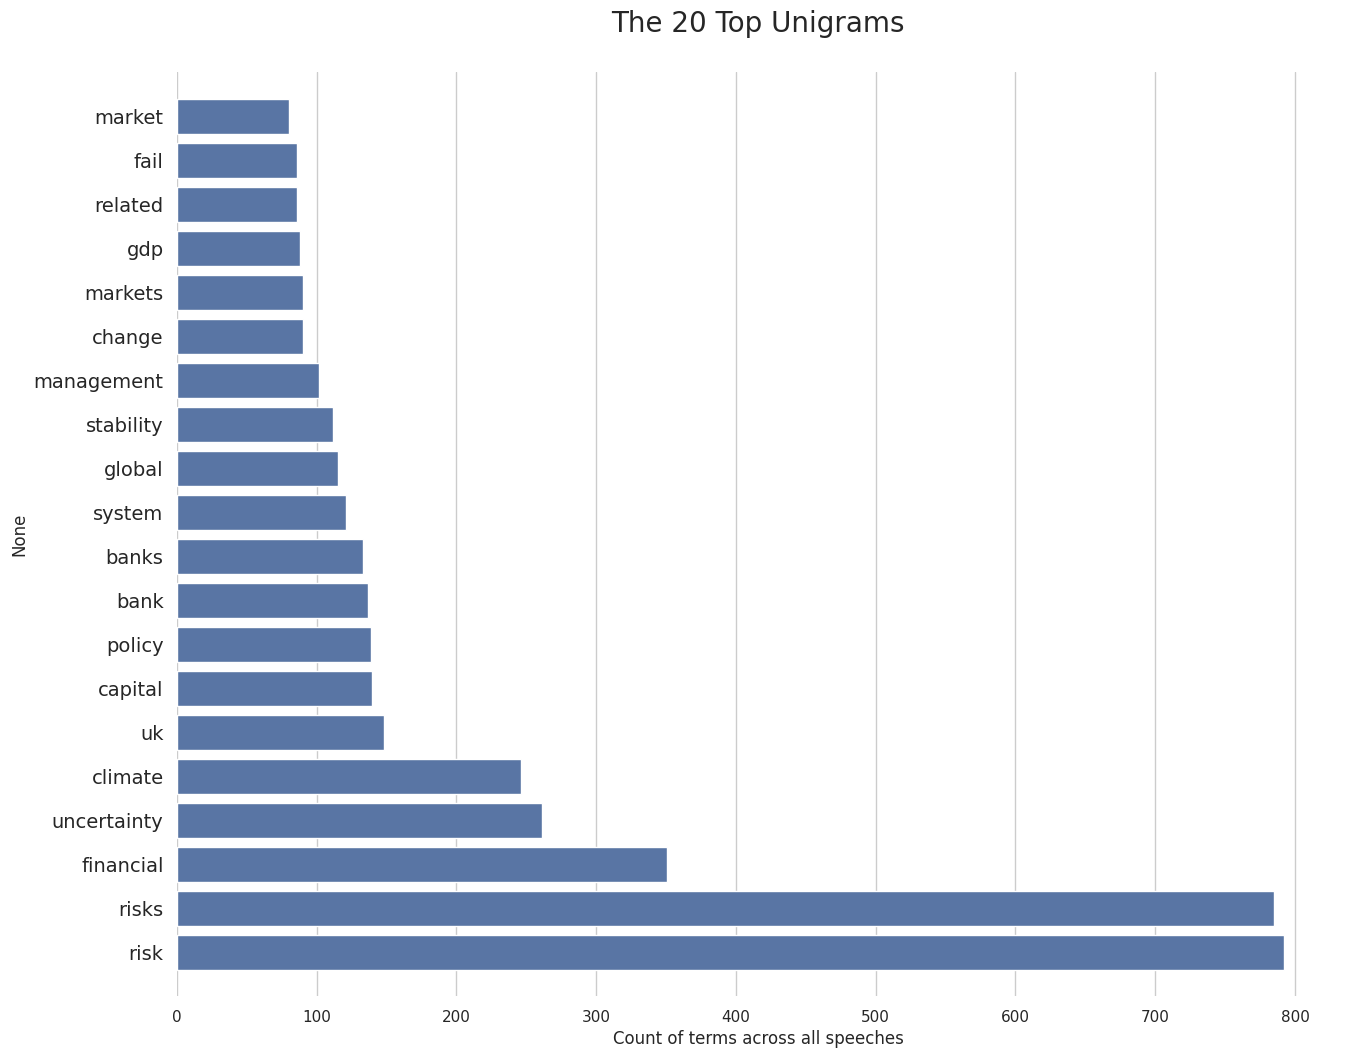

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top unigrams
def plot_top_ngrams(ngrams_df, num=20, title="Top Unigrams"):
    """
    Plots a horizontal bar chart for the top n-grams.

    Parameters:
        ngrams_df (pd.Series): Series containing n-gram counts.
        num (int): Number of top n-grams to plot.
        title (str): Title of the plot.
    """
    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 12))

    # Configure the plot
    sns.set(font_scale=2)
    sns.set_theme(style="whitegrid")
    sns.barplot(
        x=ngrams_df[:num].values,
        y=ngrams_df[:num].index,
        color="b"
    )

    # Customize plot labels and title
    ax.set_yticklabels(ngrams_df[:num].index, fontsize=14)
    ax.set_ylim(-1, num)
    ax.set_xlabel("Count of terms across all speeches")
    ax.set_title(f"The {num} {title}\n", fontsize=20)
    sns.despine(left=True, bottom=True)

    # Show the plot
    plt.show()

# Call the function to plot unigrams
plot_top_ngrams(unigrams_df, num=20, title="Top Unigrams")

<ipython-input-28-22c7aa9fde9e>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ngrams_df[:num].index, fontsize=14)


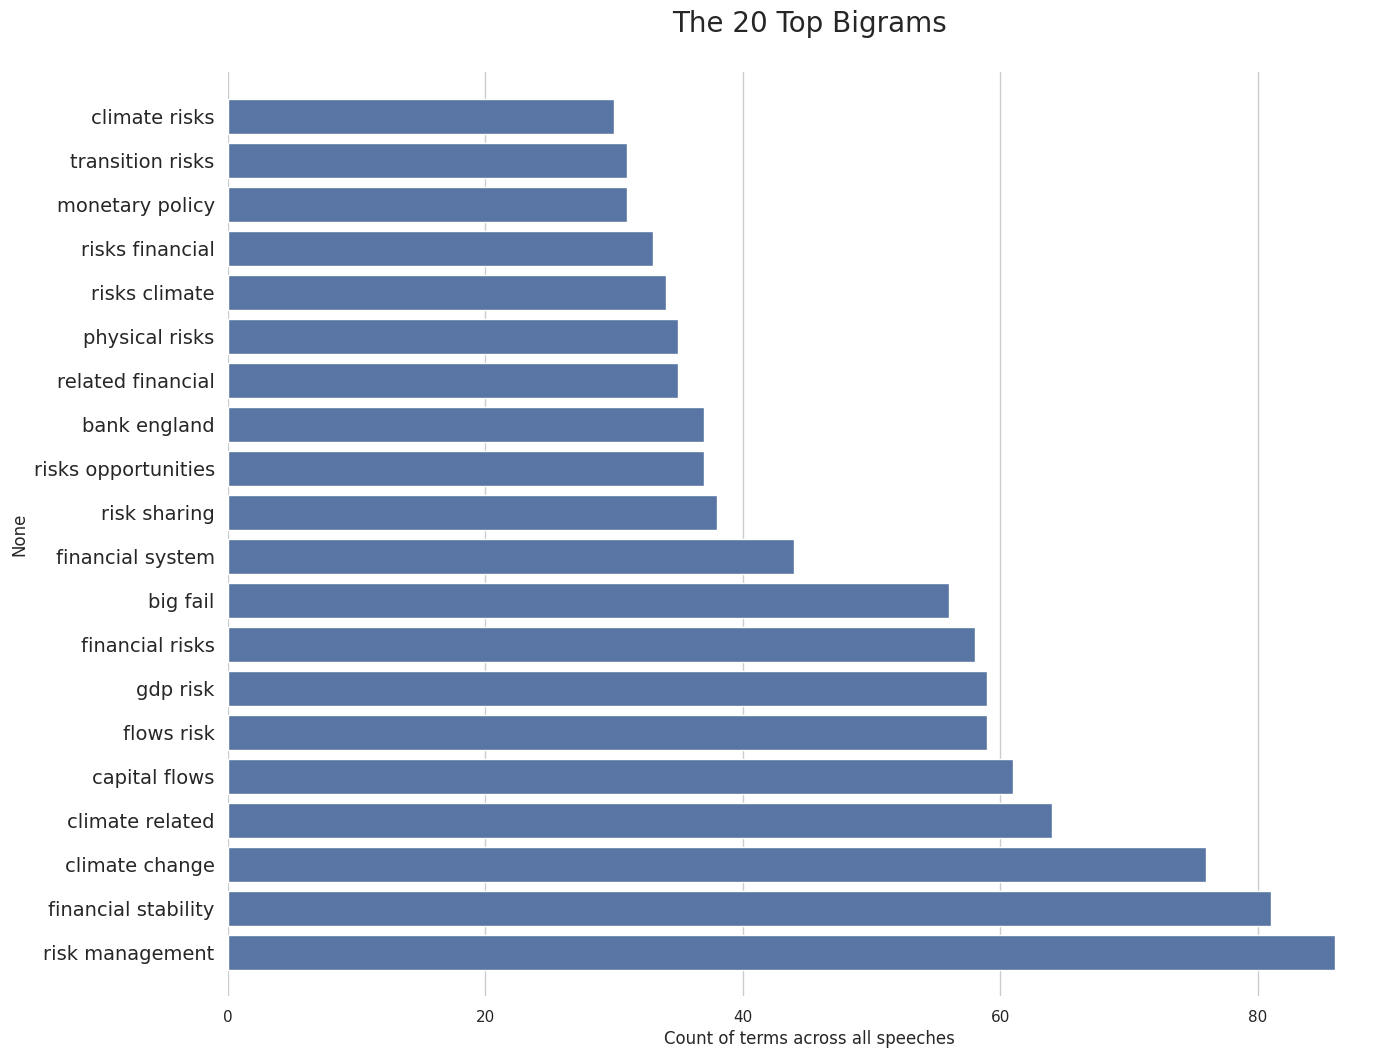

In [28]:
# Plot the top bigrams
def plot_top_ngrams(ngrams_df, num=20, title="Top N-Grams"):
    """
    Plots a horizontal bar chart for the top n-grams.

    Parameters:
        ngrams_df (pd.Series): Series containing n-gram counts.
        num (int): Number of top n-grams to plot.
        title (str): Title of the plot.
    """
    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 12))

    # Configure the plot
    sns.set(font_scale=2)
    sns.set_theme(style="whitegrid")
    sns.barplot(
        x=ngrams_df[:num].values,
        y=ngrams_df[:num].index,
        color="b"
    )

    # Customize plot labels and title
    ax.set_yticklabels(ngrams_df[:num].index, fontsize=14)
    ax.set_ylim(-1, num)
    ax.set_xlabel("Count of terms across all speeches")
    ax.set_title(f"The {num} {title}\n", fontsize=20)
    sns.despine(left=True, bottom=True)

    # Show the plot
    plt.show()

# Call the function to plot bigrams
plot_top_ngrams(bigrams_df, num=20, title="Top Bigrams")

<ipython-input-29-fe7f180d9394>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ngrams_df[:num].index, fontsize=14)


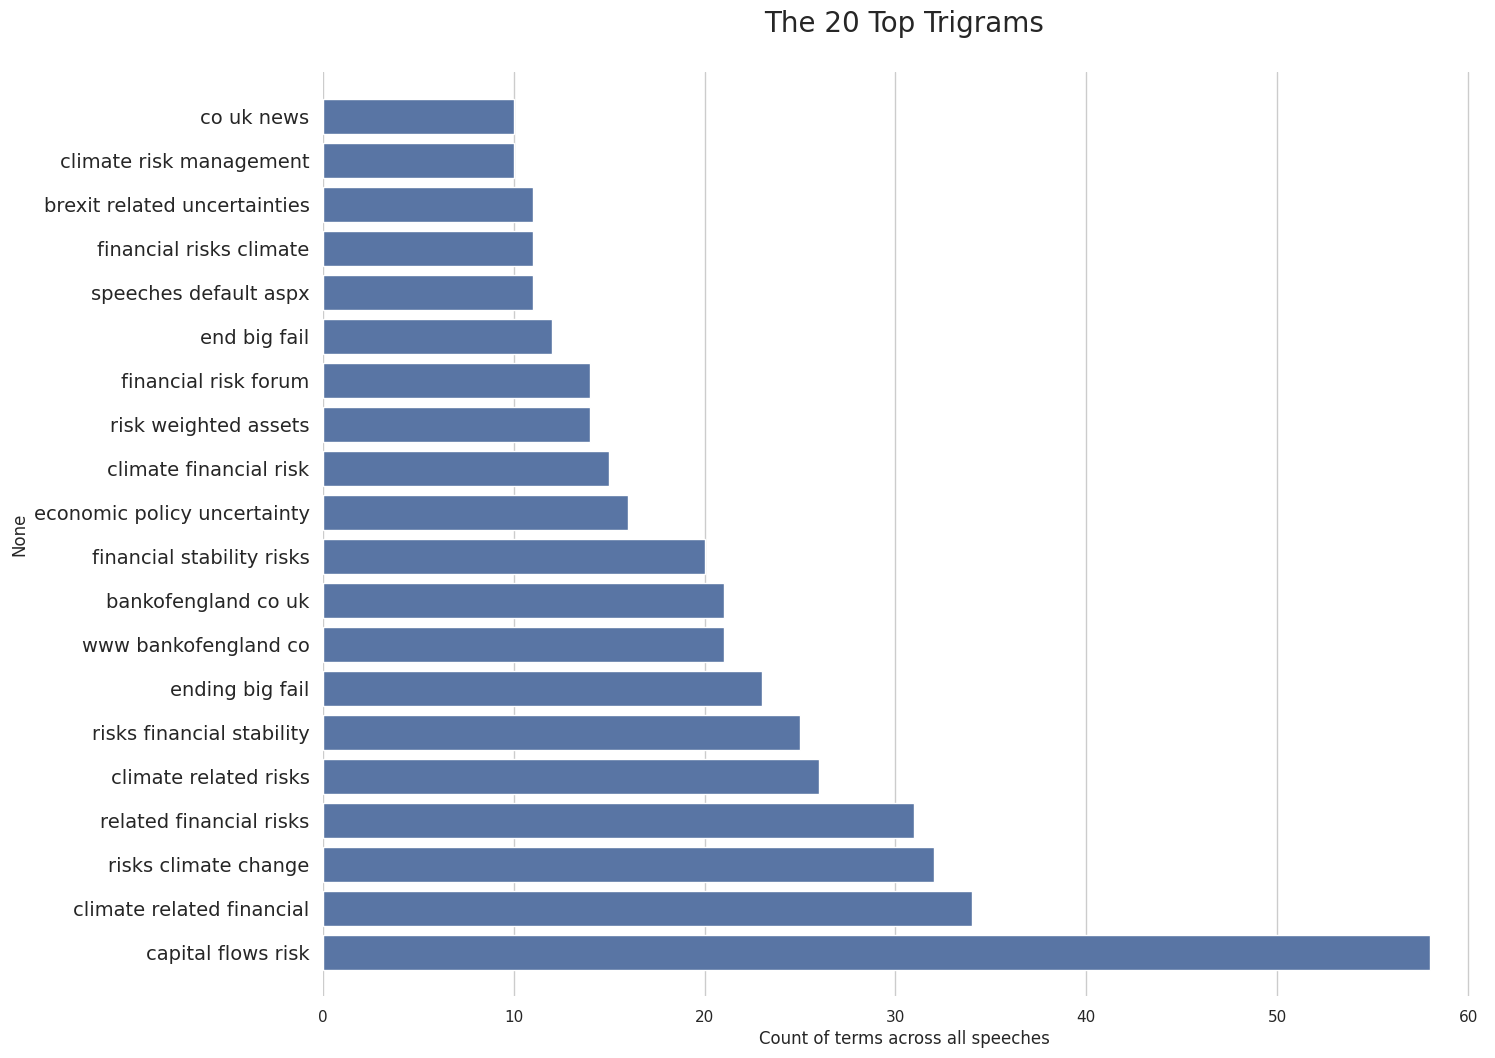

In [29]:
# Function to plot n-grams
def plot_top_ngrams(ngrams_df, num=20, title="Top N-Grams"):
    """
    Plots a horizontal bar chart for the top n-grams.

    Parameters:
        ngrams_df (pd.Series): Series containing n-gram counts.
        num (int): Number of top n-grams to plot.
        title (str): Title of the plot.
    """
    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 12))

    # Configure the plot
    sns.set(font_scale=2)
    sns.set_theme(style="whitegrid")
    sns.barplot(
        x=ngrams_df[:num].values,
        y=ngrams_df[:num].index,
        color="b"
    )

    # Customize plot labels and title
    ax.set_yticklabels(ngrams_df[:num].index, fontsize=14)
    ax.set_ylim(-1, num)
    ax.set_xlabel("Count of terms across all speeches")
    ax.set_title(f"The {num} {title}\n", fontsize=20)
    sns.despine(left=True, bottom=True)

    # Show the plot
    plt.show()

# Call the function to plot trigrams
plot_top_ngrams(trigrams_df, num=20, title="Top Trigrams")


<ipython-input-30-1e558d40f940>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ngrams_df[:num].index, fontsize=14)


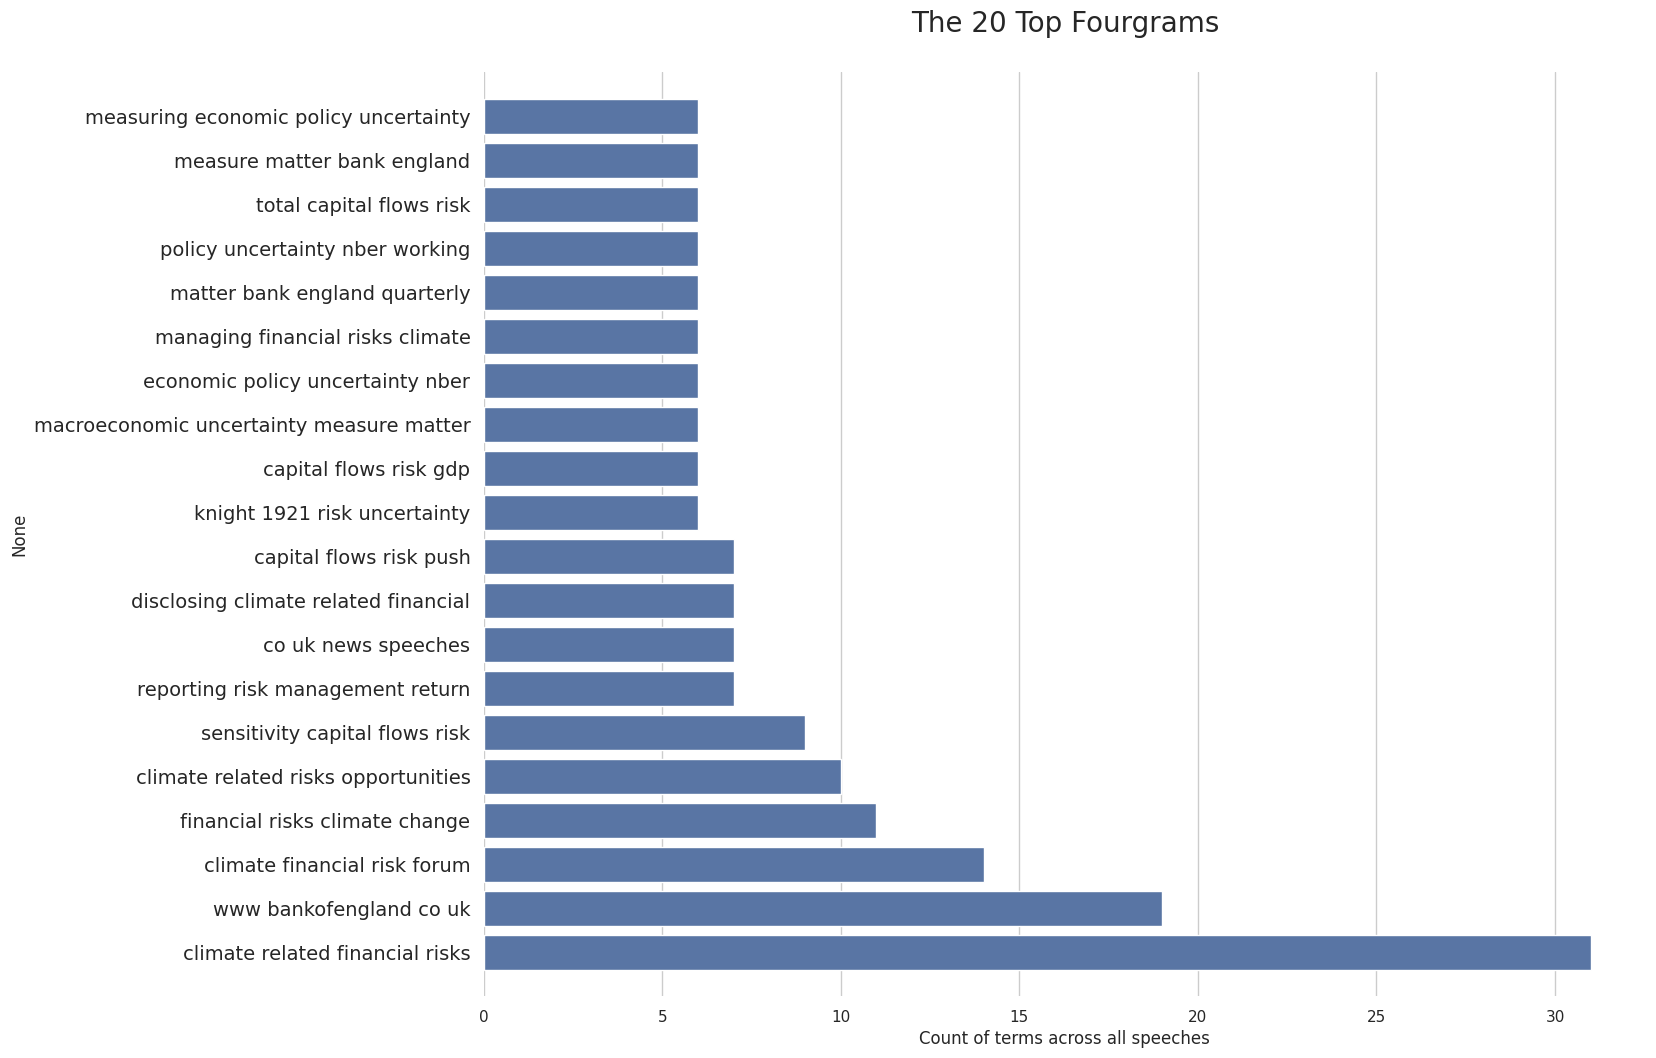

In [30]:
def plot_top_ngrams(ngrams_df, num=20, title="Top N-Grams"):
    """
    Plots a horizontal bar chart for the top n-grams.

    Parameters:
        ngrams_df (pd.Series): Series containing n-gram counts.
        num (int): Number of top n-grams to plot.
        title (str): Title of the plot.
    """
    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 12))

    # Configure the plot
    sns.set(font_scale=2)
    sns.set_theme(style="whitegrid")
    sns.barplot(
        x=ngrams_df[:num].values,
        y=ngrams_df[:num].index,
        color="b"
    )

    # Customize plot labels and title
    ax.set_yticklabels(ngrams_df[:num].index, fontsize=14)
    ax.set_ylim(-1, num)
    ax.set_xlabel("Count of terms across all speeches")
    ax.set_title(f"The {num} {title}\n", fontsize=20)
    sns.despine(left=True, bottom=True)

    # Show the plot
    plt.show()

# Call the function to plot fourgrams
plot_top_ngrams(fourgrams_df, num=20, title="Top Fourgrams")

# **TF-IDF (Term Frequency-Inverse Document Frequency)**

---

TF-IDF is a numerical statistical test that is used in text analysis to evaluate the importance of a word in document relative to a collection of documents (corpus). It is broken down by the following components:

*   **Term frequency (TF)**: the number of times a term appears in a document
*   **Document frequency (DF)**: the number of documents in which a word appears
*   **Inverse document frequency (IDF)**: weighs down frequenct terms and increases the weight of rare terms

TF-IDF was first introduced in the 1970s by researchers Karen Spärck Jones and Stephen Robertson at the University of Cambridge. It was one of the first techniques used in information retrieval, and it laid the foundation for more advanced modern processing methods.


`sklearn` is used to compute each term's *tf-idf* score using the `TfidfVectorizer` function.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a DataFrame for trigram TF-IDF scores
tfidf_vectoriser = TfidfVectorizer(
    stop_words=stopwords_list, ngram_range=(3, 3), sublinear_tf=True
)
X = tfidf_vectoriser.fit_transform(speeches["risk-centred token"])
trigram_tfidf = (
    pd.DataFrame(X.toarray(), columns=tfidf_vectoriser.get_feature_names_out())
    .T.sum(axis=1)
    .sort_values(ascending=False)
)

# Create a DataFrame for 4-gram TF-IDF scores
tfidf_vectoriser = TfidfVectorizer(
    stop_words=stopwords_list, ngram_range=(4, 4), sublinear_tf=True
)
X = tfidf_vectoriser.fit_transform(speeches["risk-centred token"])
fourgram_tfidf = (
    pd.DataFrame(X.toarray(), columns=tfidf_vectoriser.get_feature_names_out())
    .T.sum(axis=1)
    .sort_values(ascending=False)
)

# Display the top results for trigram and 4-gram TF-IDF scores
print("Top Trigram TF-IDF Scores:\n", trigram_tfidf.head(10))
print("\nTop Fourgram TF-IDF Scores:\n", fourgram_tfidf.head(10))

Top Trigram TF-IDF Scores:
 climate related financial    0.742081
risks financial stability    0.711778
related financial risks      0.708672
ending big fail              0.659953
decisions finance taken      0.611871
finance taken uncertainty    0.611871
bankofengland co uk          0.598403
climate related risks        0.588746
www bankofengland co         0.575976
capital flows risk           0.554201
dtype: float64

Top Fourgram TF-IDF Scores:
 climate related financial risks        0.700277
decisions finance taken uncertainty    0.616357
www bankofengland co uk                0.528508
reduces risks groupthink bias          0.492857
thinking reduces risks groupthink      0.492857
creative thinking reduces risks        0.492857
groupthink bias point critical         0.415542
critical decisions finance taken       0.415542
finance taken uncertainty making       0.415542
taken uncertainty making especially    0.415542
dtype: float64


<ipython-input-32-f8b0a9a8b9df>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(trigram_tfidf[:num].index, fontsize=14)


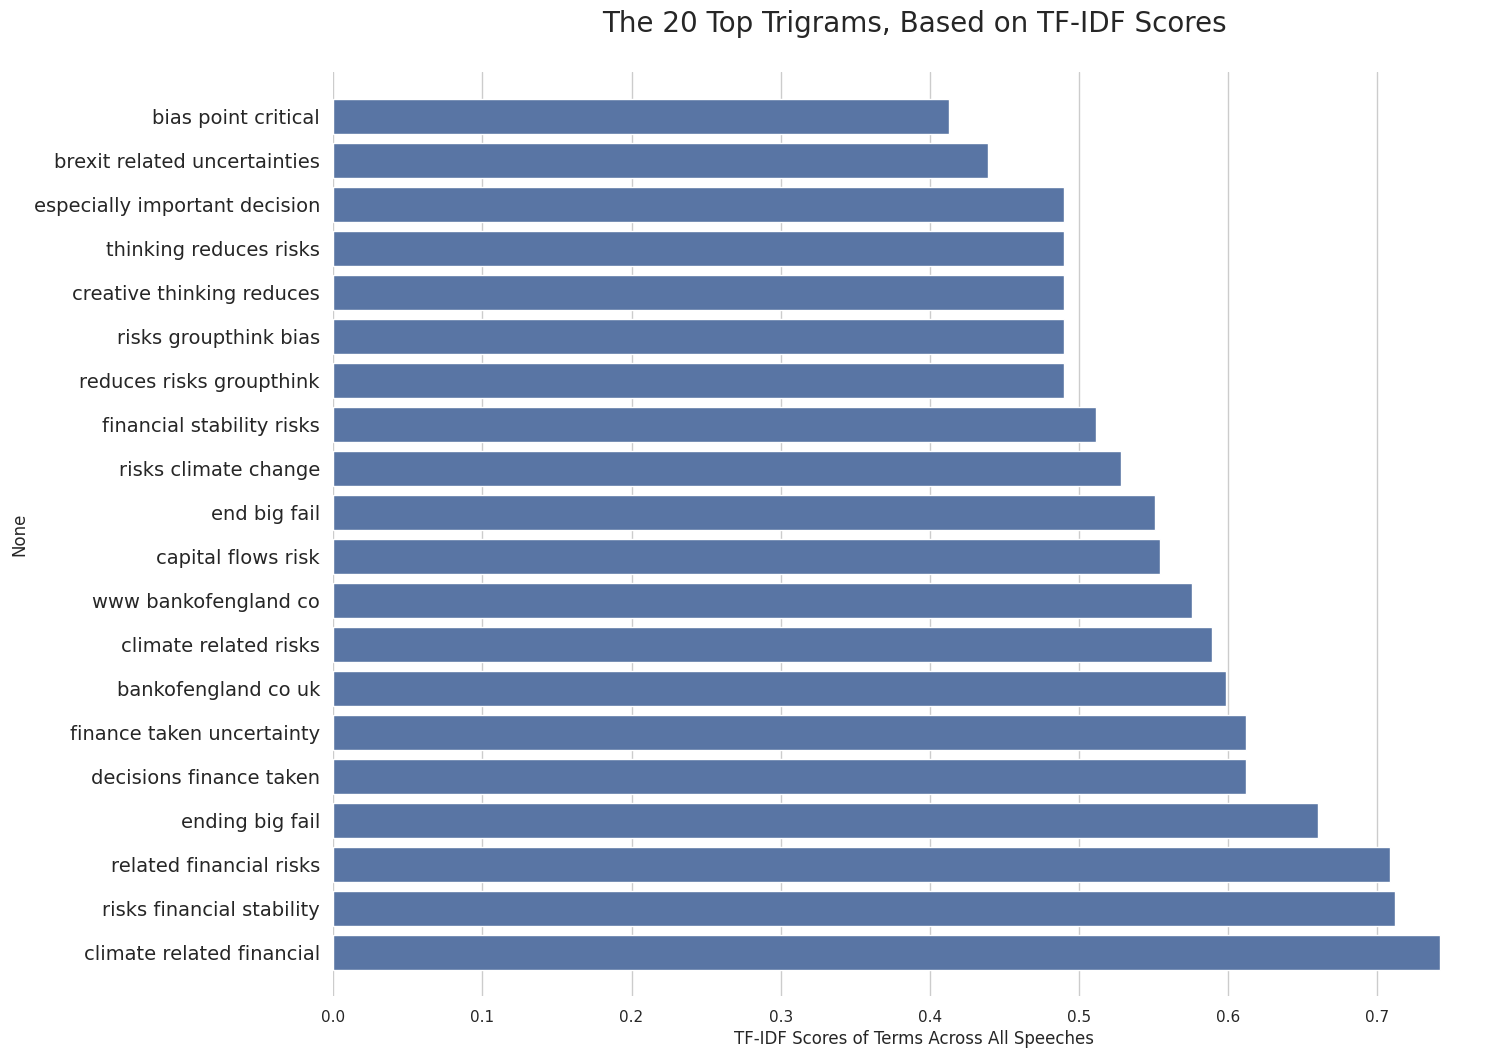

In [32]:
# Create a DataFrame for trigram TF-IDF scores
tfidf_vectoriser = TfidfVectorizer(
    stop_words=stopwords_list, ngram_range=(3, 3), sublinear_tf=True
)
X = tfidf_vectoriser.fit_transform(speeches["risk-centred token"])
trigram_tfidf = (
    pd.DataFrame(X.toarray(), columns=tfidf_vectoriser.get_feature_names_out())
    .T.sum(axis=1)
    .sort_values(ascending=False)
)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Number of trigrams to plot
num = 20

# Configure the plot
sns.set(font_scale=2)
sns.set_theme(style="whitegrid")
sns.barplot(
    x=trigram_tfidf[:num].values,
    y=trigram_tfidf[:num].index,
    color="b"
)

# Customize plot labels and title
ax.set_yticklabels(trigram_tfidf[:num].index, fontsize=14)
ax.set_ylim(-1, num)
ax.set_xlabel("TF-IDF Scores of Terms Across All Speeches")
ax.set_title(f"The {num} Top Trigrams, Based on TF-IDF Scores\n", fontsize=20)
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

<ipython-input-33-abd23dc5b4f4>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(fourgram_tfidf[:num].index, fontsize=14)


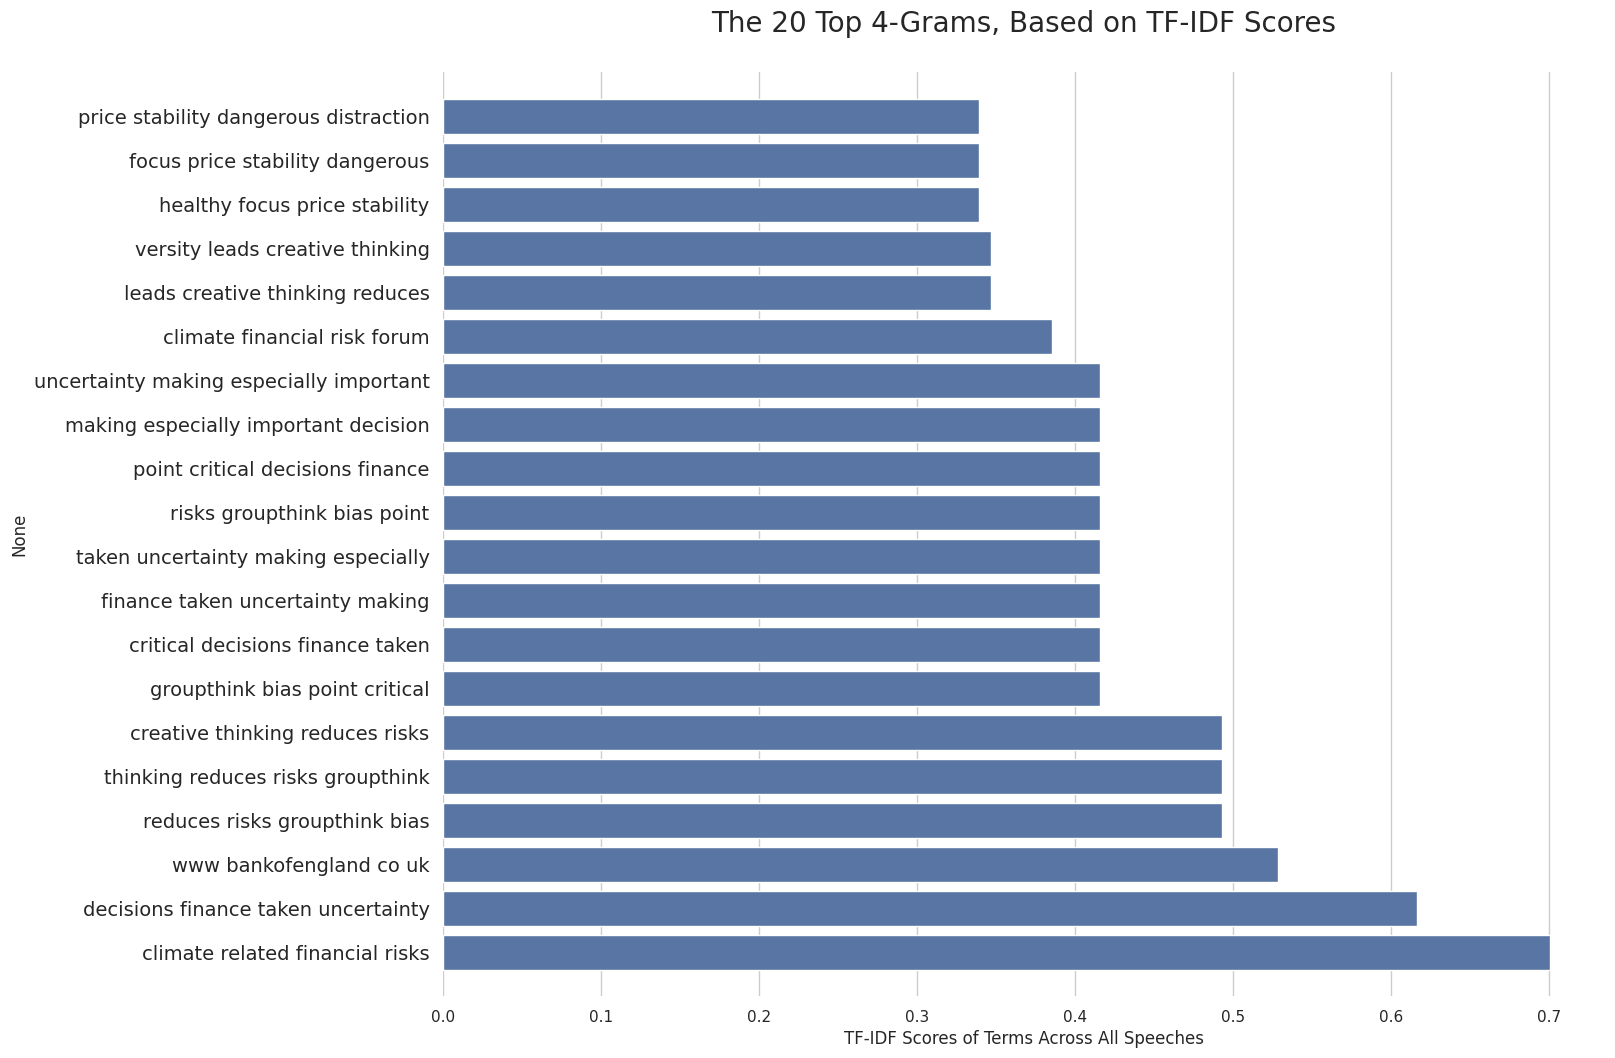

In [33]:
# Create a DataFrame for 4-gram TF-IDF scores
tfidf_vectoriser = TfidfVectorizer(
    stop_words=stopwords_list, ngram_range=(4, 4), sublinear_tf=True
)
X = tfidf_vectoriser.fit_transform(speeches["risk-centred token"])
fourgram_tfidf = (
    pd.DataFrame(X.toarray(), columns=tfidf_vectoriser.get_feature_names_out())
    .T.sum(axis=1)
    .sort_values(ascending=False)
)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Number of 4-grams to plot
num = 20

# Configure the plot
sns.set(font_scale=2)
sns.set_theme(style="whitegrid")
sns.barplot(
    x=fourgram_tfidf[:num].values,
    y=fourgram_tfidf[:num].index,
    color="b"
)

# Customize plot labels and title
ax.set_yticklabels(fourgram_tfidf[:num].index, fontsize=14)
ax.set_ylim(-1, num)
ax.set_xlabel("TF-IDF Scores of Terms Across All Speeches")
ax.set_title(f"The {num} Top 4-Grams, Based on TF-IDF Scores\n", fontsize=20)
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()